# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


In [1]:
import numpy as np
from scipy.linalg import lu, solve_triangular
import time

def inverse(A, b):
    return np.linalg.inv(A) @ b

def LU_1(A, b):
    P, L, U = lu(A)
    return solve_triangular(U, solve_triangular(L, np.dot(P, b), lower=True))

def measure_time(A, b, method, it=100):
    start = time.time()
    for i in range(it):
        method(A, b)
    stop = time.time()
    diff = stop - start
    avg = diff / it
    print(f'Średni czas działania metody {method.__name__}: {avg}')
    return avg


A_hilbert = np.linalg.inv(np.vander(np.arange(1, 16), increasing=True))

cond_hilbert = np.linalg.cond(A_hilbert)
print(f'Współczynnik uwarunkowania macierzy Hilberta: {cond_hilbert}')

b_15 = np.random.rand(15, 1)
b_100 = np.random.rand(100, 1)
b_1000 = np.random.rand(1000, 1)

A_100 = np.random.rand(100, 100)
A_1000 = np.random.rand(1000, 1000)

times_inverse_100 = measure_time(A_100, b_100, inverse)
times_LU_1_100 = measure_time(A_100, b_100, LU_1)

print("\nCzasy wykonania dla macierzy 100x100:")
print("Metoda odwracania: ", times_inverse_100)
print("Metoda LU: ", times_LU_1_100)

Współczynnik uwarunkowania macierzy Hilberta: 380713448532.12885
Średni czas działania metody inverse: 0.004069101810455322
Średni czas działania metody LU_1: 0.0029809069633483887

Czasy wykonania dla macierzy 100x100:
Metoda odwracania:  0.004069101810455322
Metoda LU:  0.0029809069633483887


# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

In [1]:
import numpy as np
from scipy.interpolate import lagrange
x1 = np.array([0, 0.25, 0.5, 0.75])
y1 = np.array([1, 1.64872, 2.71828, 4.48169])

x2 = np.array([0.1, 0.2, 0.3, 0.4])
y2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])

interpolation1 = lagrange(x1,y1)
interpolation2 = lagrange(x2,y2)

x_interp_1 = 0.43
y_interp_1 = interpolation1(x_interp_1)
x_interp_2 = 0.25
y_interp_2 = interpolation1(x_interp_2)
print(y_interp_1)
print(y_interp_2)


2.360604734079999
1.6487199999999995


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

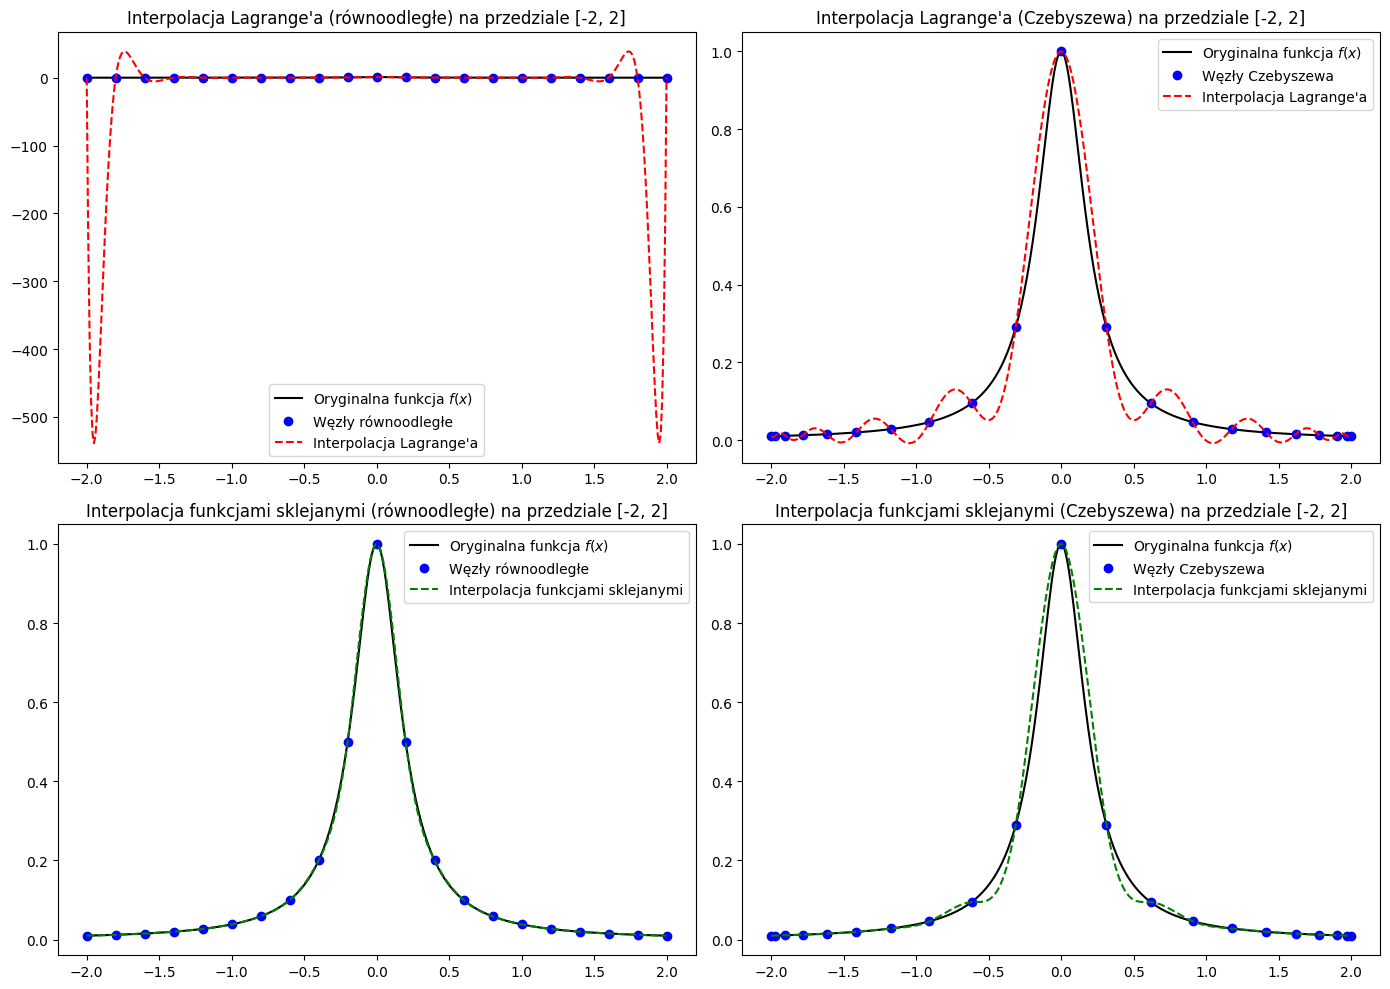

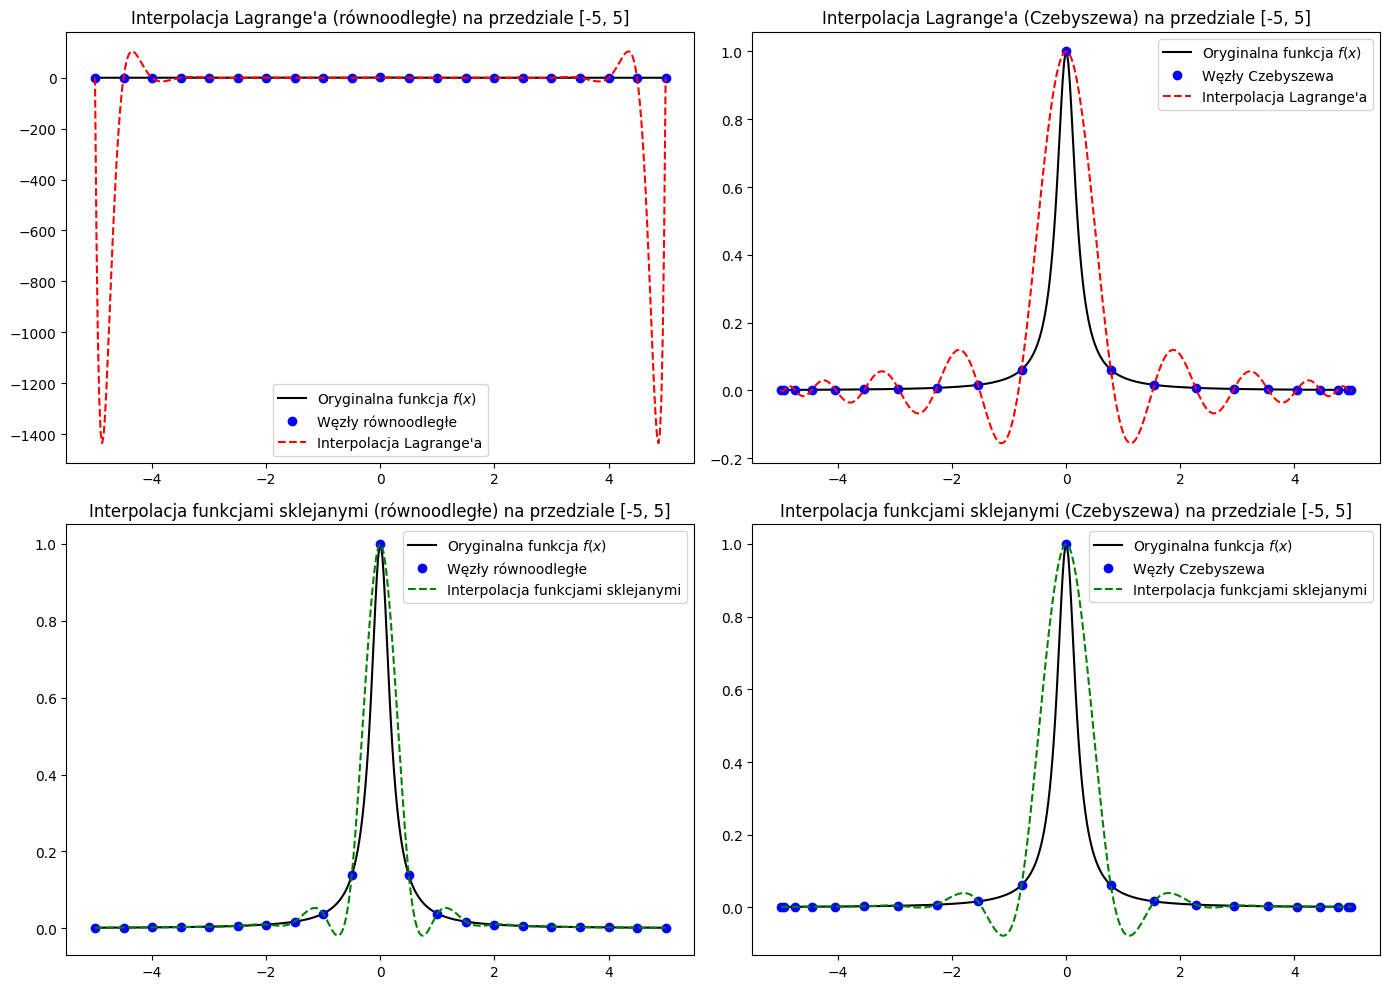

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d

# Definicja funkcji
def f(x):
    return 1 / (25 * x**2 + 1)

# Generowanie węzłów równoodległych i Czebyszewa
def generate_nodes(a, b, n, chebyshev=False):
    if chebyshev:
        return np.cos(np.linspace(0, np.pi, n)) * (b - a) / 2 + (b + a) / 2
    else:
        return np.linspace(a, b, n)

# Przedziały
intervals = [(-2, 2), (-5, 5)]
n = 21

# Plotting
for a, b in intervals:
    # Generowanie węzłów
    x_uniform = generate_nodes(a, b, n, chebyshev=False)
    x_chebyshev = generate_nodes(a, b, n, chebyshev=True)
    y_uniform = f(x_uniform)
    y_chebyshev = f(x_chebyshev)

    # Interpolacja wielomianem Lagrange'a
    lagrange_poly_uniform = lagrange(x_uniform, y_uniform)
    lagrange_poly_chebyshev = lagrange(x_chebyshev, y_chebyshev)

    # Interpolacja funkcjami sklejanymi
    cubic_spline_uniform = interp1d(x_uniform, y_uniform, kind='cubic')
    cubic_spline_chebyshev = interp1d(x_chebyshev, y_chebyshev, kind='cubic')

    # Punkty do rysowania
    x_plot = np.linspace(a, b, 400)
    y_true = f(x_plot)
    y_lagrange_uniform = lagrange_poly_uniform(x_plot)
    y_lagrange_chebyshev = lagrange_poly_chebyshev(x_plot)
    y_cubic_spline_uniform = cubic_spline_uniform(x_plot)
    y_cubic_spline_chebyshev = cubic_spline_chebyshev(x_plot)

    # Wykresy
    plt.figure(figsize=(14, 10))

    # Lagrange Uniform
    plt.subplot(2, 2, 1)
    plt.plot(x_plot, y_true, 'k-', label='Oryginalna funkcja $f(x)$')
    plt.plot(x_uniform, y_uniform, 'bo', label='Węzły równoodległe')
    plt.plot(x_plot, y_lagrange_uniform, 'r--', label='Interpolacja Lagrange\'a')
    plt.title(f'Interpolacja Lagrange\'a (równoodległe) na przedziale [{a}, {b}]')
    plt.legend()

    # Lagrange Chebyshev
    plt.subplot(2, 2, 2)
    plt.plot(x_plot, y_true, 'k-', label='Oryginalna funkcja $f(x)$')
    plt.plot(x_chebyshev, y_chebyshev, 'bo', label='Węzły Czebyszewa')
    plt.plot(x_plot, y_lagrange_chebyshev, 'r--', label='Interpolacja Lagrange\'a')
    plt.title(f'Interpolacja Lagrange\'a (Czebyszewa) na przedziale [{a}, {b}]')
    plt.legend()

    # Cubic Spline Uniform
    plt.subplot(2, 2, 3)
    plt.plot(x_plot, y_true, 'k-', label='Oryginalna funkcja $f(x)$')
    plt.plot(x_uniform, y_uniform, 'bo', label='Węzły równoodległe')
    plt.plot(x_plot, y_cubic_spline_uniform, 'g--', label='Interpolacja funkcjami sklejanymi')
    plt.title(f'Interpolacja funkcjami sklejanymi (równoodległe) na przedziale [{a}, {b}]')
    plt.legend()

    # Cubic Spline Chebyshev
    plt.subplot(2, 2, 4)
    plt.plot(x_plot, y_true, 'k-', label='Oryginalna funkcja $f(x)$')
    plt.plot(x_chebyshev, y_chebyshev, 'bo', label='Węzły Czebyszewa')
    plt.plot(x_plot, y_cubic_spline_chebyshev, 'g--', label='Interpolacja funkcjami sklejanymi')
    plt.title(f'Interpolacja funkcjami sklejanymi (Czebyszewa) na przedziale [{a}, {b}]')
    plt.legend()

    plt.tight_layout()
    plt.show()


***Zadanie 4.***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Dane z tabeli
t = np.array([0.0, 1.0, 2.0, 3.0])
s = np.array([0.0, 42.7, 73.2, 92.5])

# Interpolacja funkcjami sklejanymi trzeciego stopnia
cs = CubicSpline(t, s)

# Znalezienie czasu, w którym położenie wynosiło 79.6 m
target_position = 79.6

# Funkcja pomocnicza do znalezienia czasu dla zadanej pozycji
def find_time_for_position(cs, position, start_time, end_time):
    from scipy.optimize import brentq
    root = brentq(lambda t: cs(t) - position, start_time, end_time)
    return root

# Zakres czasowy, w którym szukamy (pomiędzy 2 a 3 sekundami)
time_at_position = find_time_for_position(cs, target_position, 2.0, 3.0)

# Obliczenie prędkości jako pochodnej funkcji sklejanej w znalezionym czasie
velocity_at_position = cs(time_at_position, 1)  # pierwsza pochodna

print(f"Czas przejazdu przez punkt 79.6 m: {time_at_position:.4f} s")
print(f"Prędkość w tym punkcie: {velocity_at_position:.4f} m/s")

Czas przejazdu przez punkt 79.6 m: 2.2758 s
Prędkość w tym punkcie: 21.6819 m/s


**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.
